# **üîç 1. Cargar y explorar datos**



## **1.1 Vista general del dataset**

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("../data/datos_telecom.csv")

In [81]:
df.head()

Evasi√≥n     G√©nero  Adulto Mayor  Tiene Pareja  Dependiente  Permanencia  \
0    False   Femenino         False          True         True            9   
1    False  Masculino         False         False        False            9   
2     True  Masculino         False         False        False            4   
3     True  Masculino          True          True        False           13   
4     True   Femenino          True          True        False            3   

   Servicio Telef√≥nico  L√≠neas M√∫ltiples Servicio Internet  \
0                 True             False               DSL   
1                 True              True               DSL   
2                 True             False      Fibra √≥ptica   
3                 True             False      Fibra √≥ptica   
4                 True             False      Fibra √≥ptica   

   Seguridad en L√≠nea  ...  Protecci√≥n Dispositivo  Soporte T√©cnico  \
0               False  ...                   False             True   
1               False  ...                   False            False   
2               False  ...                    True            False   
3               False  ...                    True            False   
4               False  ...                   False             True   

   Streaming de TV  Streaming de Pel√≠culas  Tipo Contrato  \
0             True                   False         Un a√±o   
1            False                    True      Mes-a-Mes   
2            False                   False      Mes-a-Mes   
3             True                    True      Mes-a-Mes   
4             True                   False      Mes-a-Mes   

  Facturaci√≥n Electronica      M√©todo de Pago Cargo Mensual  Cargo Total  \
0                    True   Cheque por correo          65.6       593.30   
1                   False   Cheque por correo          59.9       542.40   
2                    True  Cheque electr√≥nico          73.9       280.85   
3                    True  Cheque electr√≥nico          98.0      1237.85   
4                    True   Cheque por correo          83.9       267.40   

   Cargo Diario  
0      2.186667  
1      1.996667  
2      2.463333  
3      3.266667  
4      2.796667  

[5 rows x 21 columns]

## **1.2 Dimensiones del dataset**

In [82]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 7267, Columnas: 21


## **1.3 Tipos de datos y valores √∫nicos**



Identificar si hay columnas categ√≥ricas mal tipadas.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasi√≥n                  7267 non-null   bool   
 1   G√©nero                   7267 non-null   object 
 2   Adulto Mayor             7267 non-null   bool   
 3   Tiene Pareja             7267 non-null   bool   
 4   Dependiente              7267 non-null   bool   
 5   Permanencia              7267 non-null   int64  
 6   Servicio Telef√≥nico      7267 non-null   bool   
 7   L√≠neas M√∫ltiples         7267 non-null   bool   
 8   Servicio Internet        7267 non-null   object 
 9   Seguridad en L√≠nea       7267 non-null   bool   
 10  Respaldo en Linea        7267 non-null   bool   
 11  Protecci√≥n Dispositivo   7267 non-null   bool   
 12  Soporte T√©cnico          7267 non-null   bool   
 13  Streaming de TV          7267 non-null   bool   
 14  Streaming de Pel

## **1.4 Valores faltantes**



Se identifican columnas con datos faltantes (NaN, None, etc.), que podr√≠an requerir imputaci√≥n o eliminaci√≥n.

In [84]:
df.isnull().sum()

Evasi√≥n                    0
G√©nero                     0
Adulto Mayor               0
Tiene Pareja               0
Dependiente                0
Permanencia                0
Servicio Telef√≥nico        0
L√≠neas M√∫ltiples           0
Servicio Internet          0
Seguridad en L√≠nea         0
Respaldo en Linea          0
Protecci√≥n Dispositivo     0
Soporte T√©cnico            0
Streaming de TV            0
Streaming de Pel√≠culas     0
Tipo Contrato              0
Facturaci√≥n Electronica    0
M√©todo de Pago             0
Cargo Mensual              0
Cargo Total                0
Cargo Diario               0
dtype: int64

## **1.5 Distribuci√≥n de la variable objetivo**



Como el objetivo es predecir "Evasi√≥n", se analiza la proporci√≥n de clases. Esto es clave para saber si existe desbalanceo.

Evasi√≥n
False    5398
True     1869
Name: count, dtype: int64

Evasi√≥n
False    0.74281
True     0.25719
Name: proportion, dtype: float64



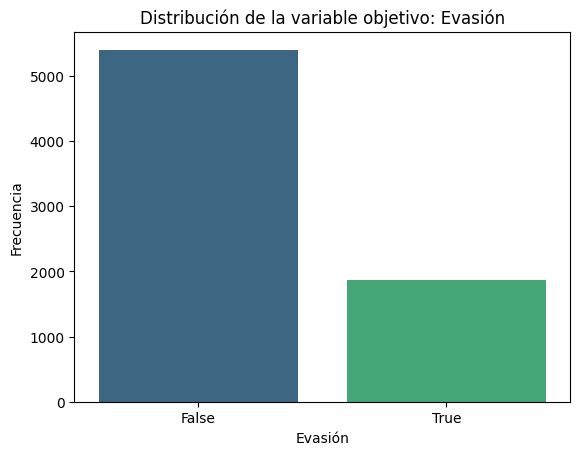

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo absoluto y relativo
print(df['Evasi√≥n'].value_counts())
print('')
print(df['Evasi√≥n'].value_counts(normalize=True))
print('')
# Gr√°fico de barras
sns.countplot(data=df, x='Evasi√≥n', palette='viridis', hue='Evasi√≥n', legend=False)
plt.xlabel('Evasi√≥n')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de la variable objetivo: Evasi√≥n')
plt.show()

# **üßπ 2. Limpiar y preparar datos**

## **2.1 Eliminaci√≥n de columnas redundantes**

- `Cargo Diario` es una transformaci√≥n directa de `Cargo Mensual` (Mensual / 30).

- `Cargo Total` es producto de `Cargo Mensual` √ó `Permanencia` (salvo ligeros redondeos o descuentos puntuales).

Estas columnas no aportan nueva informaci√≥n y podr√≠an inducir multicolinealidad o hacer que el modelo sobreajuste. Por lo tanto, las eliminamos.

In [86]:
# Eliminaci√≥n de columnas derivadas
df.drop(['Cargo Diario', 'Cargo Total'], axis=1, inplace=True)

## **2.2 Revisi√≥n de columnas con baja variabilidad**

Aunque `df.info()` muestra que todas las columnas tienen m√°s de un valor, es conveniente inspeccionar aquellas con muy poca variabilidad, ya que podr√≠an no aportar informaci√≥n √∫til al modelo.

In [87]:
low_variability = df.nunique().sort_values()
print(low_variability)

Evasi√≥n                       2
Facturaci√≥n Electronica       2
Streaming de Pel√≠culas        2
Streaming de TV               2
Soporte T√©cnico               2
Protecci√≥n Dispositivo        2
Respaldo en Linea             2
Seguridad en L√≠nea            2
Servicio Telef√≥nico           2
Dependiente                   2
Tiene Pareja                  2
Adulto Mayor                  2
G√©nero                        2
L√≠neas M√∫ltiples              2
Servicio Internet             3
Tipo Contrato                 3
M√©todo de Pago                4
Permanencia                  73
Cargo Mensual              1585
dtype: int64


**El an√°lisis de cardinalidad confirma lo siguiente:**

Todas las columnas tienen al menos 2 valores √∫nicos, por lo que no existen columnas constantes. Sin embargo, como observaci√≥n:

- Hay muchas columnas binarias (bool) con solo 2 valores, lo cual es esperable.

- Columnas como `G√©nero` o `Adulto Mayor` con solo dos valores no deben eliminarse aunque su variabilidad sea baja, ya que pueden ser informativas para el modelo si est√°n correlacionadas con el **churn**.

As√≠ que no eliminamos ninguna columna adicional por baja cardinalidad.

## **2.3 Codificaci√≥n preliminar de variables categ√≥ricas**

Antes del modelado, ser√° necesario convertir variables object a num√©ricas. Pero por ahora solo identificamos las columnas categ√≥ricas que requerir√°n transformaci√≥n m√°s adelante:

In [88]:
categorical_cols = df.select_dtypes(include='object').columns
print("Columnas categ√≥ricas:", list(categorical_cols))

Columnas categ√≥ricas: ['G√©nero', 'Servicio Internet', 'Tipo Contrato', 'M√©todo de Pago']


# **üìä 3. An√°lisis de correlaciones y detecci√≥n de outliers**

## **3.1 Matriz de correlaci√≥n**

Ya que has limpiado las columnas derivadas, es momento de observar la relaci√≥n entre las variables num√©ricas y el churn (aunque Evasi√≥n es categ√≥rica, podr√≠amos incluirla como 0/1 para an√°lisis de correlaci√≥n).

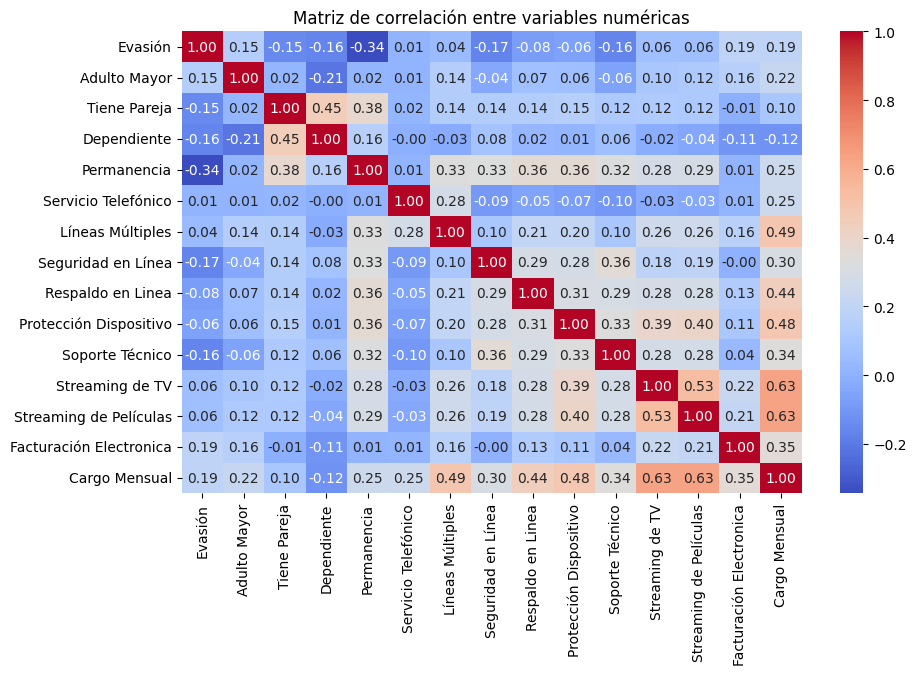

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos la variable objetivo a entero para la correlaci√≥n
df_corr = df.copy()
df_corr['Evasi√≥n'] = df_corr['Evasi√≥n'].astype(int)

# Correlaci√≥n solo con columnas num√©ricas
correlation_matrix = df_corr.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n entre variables num√©ricas')
plt.show()

**üî∑ Correlaci√≥n con la variable objetivo (Evasi√≥n)**

- La correlaci√≥n m√°s negativa con `Evasi√≥n` es `Permanencia` (-0.34), lo cual es coherente: _a mayor tiempo con el servicio, menor probabilidad de churn_.

- `Seguridad en L√≠nea` (-0.17), `Dependiente` (-0.16) y `Tiene Pareja` (-0.15) tambi√©n muestran correlaciones negativas moderadas.

- `Cargo Mensual` tiene una correlaci√≥n positiva (0.19), lo cual sugiere que tarifas m√°s altas pueden estar asociadas a mayor evasi√≥n.

- Las variables `Streaming de TV` y `Streaming de Pel√≠culas` est√°n fuertemente correlacionadas entre s√≠ (>0.6), lo cual indica una posible redundancia futura a evaluar con modelos de selecci√≥n de features.


## **3.2 Detecci√≥n de outliers**

Graficamos boxplots para detectar valores extremos en las variables continuas:

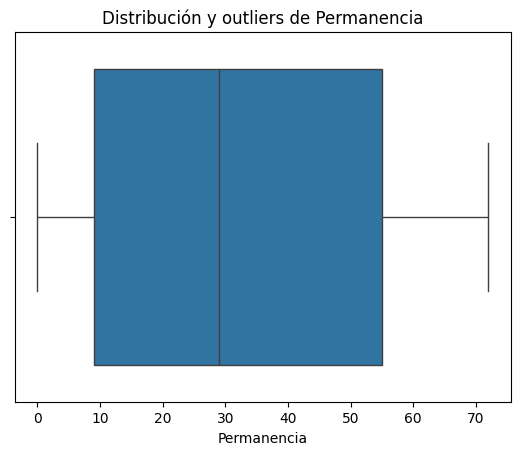

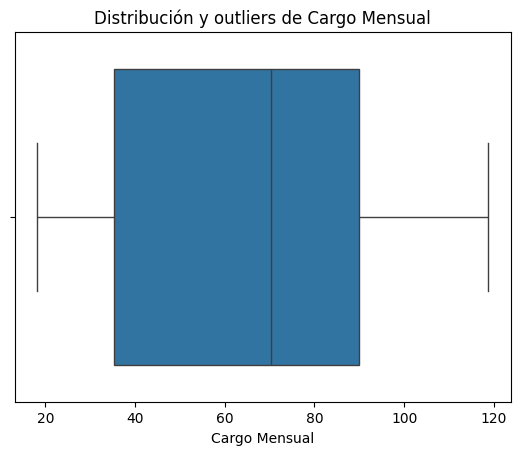

In [90]:
numeric_cols = ['Permanencia', 'Cargo Mensual']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribuci√≥n y outliers de {col}')
    plt.show()

**üî∂ Outliers**

Los boxplots de `Permanencia` y `Cargo Mensual` no muestran valores extremos preocupantes. Ambos se distribuyen de forma razonable y no justifican una imputaci√≥n ni eliminaci√≥n de outliers en este punto.

Por tanto, no se requiere tratamiento adicional para valores extremos en esta fase.

---

**‚úÖ Conclusi√≥n de esta secci√≥n**

Se identificaron correlaciones moderadas entre variables num√©ricas y la evasi√≥n, destacando que la permanencia reduce el churn, mientras que tarifas m√°s altas parecen asociarse a mayor abandono. No se detectaron outliers extremos, por lo que no fue necesario aplicar transformaciones adicionales.

# **üß™ 4. Dividir datos y seleccionar features**

## **4.1 Preparaci√≥n del target y codificaci√≥n**

Convertimos la variable objetivo `Evasi√≥n` a tipo entero (0 = No, 1 = S√≠) y realizamos codificaci√≥n one-hot de variables categ√≥ricas (object) para poder entrenar modelos.

In [91]:
# Copia de trabajo
df_model = df.copy()

# Codificar variable objetivo
df_model['Evasi√≥n'] = df_model['Evasi√≥n'].astype(int)

# Codificaci√≥n one-hot para variables categ√≥ricas
df_model = pd.get_dummies(df_model, drop_first=True)

print("Shape final del dataframe codificado:", df_model.shape)

Shape final del dataframe codificado: (7267, 23)


## **4.2 Divisi√≥n en variables predictoras (X) y objetivo (y)**

In [92]:
X = df_model.drop('Evasi√≥n', axis=1)
y = df_model['Evasi√≥n']

## **4.3 Divisi√≥n en conjunto de entrenamiento y prueba**

Usamos una divisi√≥n estratificada para preservar la proporci√≥n de clases del churn:

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tama√±o de entrenamiento:", X_train.shape)
print("Tama√±o de prueba:", X_test.shape)

Tama√±o de entrenamiento: (5813, 22)
Tama√±o de prueba: (1454, 22)


# **ü§ñ 5. Entrenar modelos base (Logistic Regression y Decision Tree)**

## **5.1 Estandarizaci√≥n (solo para regresi√≥n log√≠stica)**

La regresi√≥n log√≠stica es sensible a la escala de los datos. Por eso, aplicamos escalamiento solo para ese modelo. El √°rbol de decisi√≥n no lo requiere.

In [94]:
from sklearn.preprocessing import StandardScaler

# Estandarizar caracter√≠sticas para regresi√≥n log√≠stica
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **5.2 Entrenamiento de modelos**

Entrenamos ambos modelos y evaluamos su rendimiento con m√©tricas b√°sicas.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inicializaci√≥n
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **5.3 Evaluaci√≥n en el set de prueba**

In [96]:
# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)

# Funci√≥n auxiliar para mostrar m√©tricas
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"--- {nombre} ---")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print()

# Evaluar
evaluar_modelo("Regresi√≥n Log√≠stica", y_test, y_pred_lr)
evaluar_modelo("√Årbol de Decisi√≥n", y_test, y_pred_dt)

--- Regresi√≥n Log√≠stica ---
Accuracy : 0.8006
Precision: 0.6338
Recall   : 0.5321
F1 Score : 0.5785

--- √Årbol de Decisi√≥n ---
Accuracy : 0.7235
Precision: 0.4632
Recall   : 0.4706
F1 Score : 0.4668



**üìå Interpretaci√≥n de modelos base**

**üî∑ Regresi√≥n Log√≠stica**

- **Accuracy:** 80% ‚Äì alto, pero enga√±oso si recordamos que la clase mayoritaria (no churn) representa el 74.3%.

- **Precision:** 63% ‚Äì cuando predice churn, acierta 63% de las veces.

- **Recall:** 53% ‚Äì detecta solo la mitad de los casos reales de churn.

- **F1 Score:** 57% ‚Äì balance aceptable, pero podr√≠a mejorarse.

> _Este modelo se comporta de manera moderada y equilibrada, lo que lo hace √∫til como baseline._

**üî∂ √Årbol de Decisi√≥n**

- **Accuracy:** 72% ‚Äì menor que el baseline de clase mayoritaria.

- **Precision y Recall** alrededor del 46% ‚Äì pobre capacidad para detectar correctamente casos positivos.

- **F1 Score:** 46% ‚Äì muestra que est√° por debajo del desempe√±o de la regresi√≥n log√≠stica.

> _El √°rbol, sin ajustes, no generaliza bien. Esto es com√∫n con √°rboles sin podar ni optimizar._

# **üìà 6. Evaluar modelos con matriz de confusi√≥n y curva ROC**

## **6.1 Matriz de confusi√≥n**

Permite ver errores tipo I y II de forma m√°s clara.

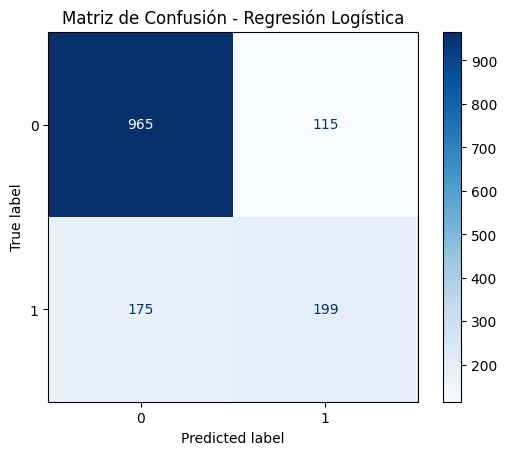

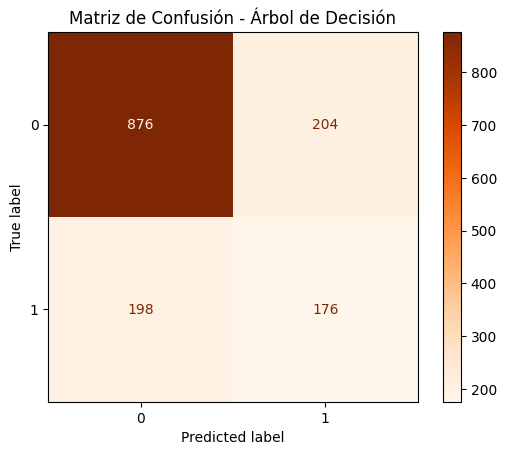

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Regresi√≥n Log√≠stica
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')
plt.title('Matriz de Confusi√≥n - Regresi√≥n Log√≠stica')
plt.show()

# √Årbol de Decisi√≥n
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Oranges')
plt.title('Matriz de Confusi√≥n - √Årbol de Decisi√≥n')
plt.show()

**üìå An√°lisis de las matrices de confusi√≥n**

**üî∑ Regresi√≥n Log√≠stica**

- **Verdaderos Negativos (TN):** 965. El modelo identific√≥ correctamente 965 casos de la clase 0.

- **Falsos Positivos (FP):** 115. El modelo predijo incorrectamente 115 casos como clase 1 cuando en realidad eran clase 0.

- **Falsos Negativos (FN):** 175. El modelo predijo incorrectamente 175 casos como clase 0 cuando en realidad eran clase 1.

- **Verdaderos Positivos (TP):** 199. El modelo identific√≥ correctamente 199 casos de la clase 1.

**üî∂ √Årbol de Decisi√≥n**

- **Verdaderos Negativos (TN):** 876. El modelo identific√≥ correctamente 876 casos de la clase 0.

- **Falsos Positivos (FP):** 204. El modelo predijo incorrectamente 204 casos como clase 1 cuando en realidad eran clase 0.

- **Falsos Negativos (FN):** 198. El modelo predijo incorrectamente 198 casos como clase 0 cuando en realidad eran clase 1.

- **Verdaderos Positivos (TP):** 176. El modelo identific√≥ correctamente 176 casos de la clase 1.



## **6.2 Curva ROC y AUC**

Permite evaluar el modelo m√°s all√° del umbral de 0.5, especialmente √∫til en datasets desbalanceados como este.

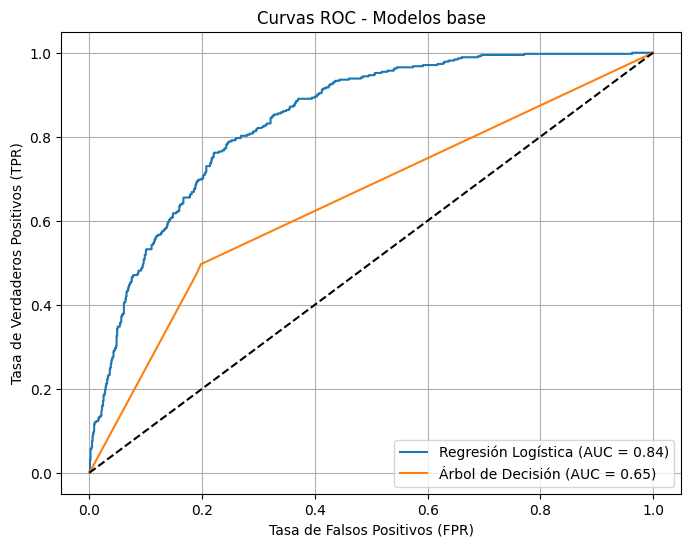

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades
y_probs_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_probs_dt = dt.predict_proba(X_test)[:, 1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)

# AUC
auc_lr = roc_auc_score(y_test, y_probs_lr)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Regresi√≥n Log√≠stica (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'√Årbol de Decisi√≥n (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Modelos base')
plt.legend()
plt.grid()
plt.show()

**An√°lisis de la Curva ROC**

- **Regresi√≥n Log√≠stica (AUC = 0.84):** La curva azul se eleva r√°pidamente y se mantiene cerca de la esquina superior izquierda. Su alto valor de AUC (0.84) indica que el modelo tiene una alta capacidad para distinguir entre las clases positiva y negativa.

- **√Årbol de Decisi√≥n (AUC = 0.65):** La curva naranja est√° m√°s cerca de la l√≠nea diagonal, lo que indica un rendimiento significativamente inferior. Su valor de AUC (0.65) muestra que el modelo es menos efectivo en la clasificaci√≥n que la regresi√≥n log√≠stica.

> _La curva ROC (Receiver Operating Characteristic) mide el rendimiento de un modelo de clasificaci√≥n en todos los umbrales de clasificaci√≥n. La l√≠nea diagonal punteada representa un clasificador aleatorio. Un buen modelo tendr√° una curva que se curvea hacia la esquina superior izquierda. La m√©trica AUC (√Årea bajo la curva) resume el rendimiento del modelo; cuanto m√°s cerca est√© de 1, mejor._

# **‚öñÔ∏è 7. Balanceo de clases y modelos avanzados con SMOTE**

Vamos a:

1. Aplicar **SMOTE** para balancear la clase minoritaria (Evasi√≥n = 1)

2. Entrenar dos modelos avanzados:

  - **Random Forest**

  - **XGBoost**

Ambos son robustos ante ruido, pueden manejar variables no lineales, y son capaces de capturar interacciones complejas. Con **SMOTE**, buscamos mejorar el **recall** sin sacrificar demasiado precisi√≥n o **AUC**.

## **7.1 Aplicar SMOTE al set de entrenamiento**

> _**Nota:** **SMOTE** se aplica solo al set de entrenamiento para evitar data leakage._

In [99]:
from imblearn.over_sampling import SMOTE

# Inicializamos SMOTE
smote = SMOTE(random_state=42)

# Aplicamos sobre X_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribuci√≥n de clases despu√©s de SMOTE:")
print(y_train_resampled.value_counts())

Distribuci√≥n de clases despu√©s de SMOTE:
Evasi√≥n
0    4318
1    4318
Name: count, dtype: int64


## **7.2 Entrenar modelos avanzados**

### **7.2.1 Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### **7.2.2 XGBoost**

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:57:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **7.3 Evaluaci√≥n de los modelos balanceados**

In [102]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Probabilidades
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Reporte de clasificaci√≥n
print("Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))
print('')
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb, digits=4))

Random Forest:
              precision    recall  f1-score   support

           0     0.8526    0.8407    0.8466      1080
           1     0.5578    0.5802    0.5688       374

    accuracy                         0.7737      1454
   macro avg     0.7052    0.7105    0.7077      1454
weighted avg     0.7768    0.7737    0.7752      1454


XGBoost:
              precision    recall  f1-score   support

           0     0.8407    0.8259    0.8333      1080
           1     0.5216    0.5481    0.5346       374

    accuracy                         0.7545      1454
   macro avg     0.6812    0.6870    0.6839      1454
weighted avg     0.7586    0.7545    0.7564      1454



## **7.4 Curva ROC y AUC**

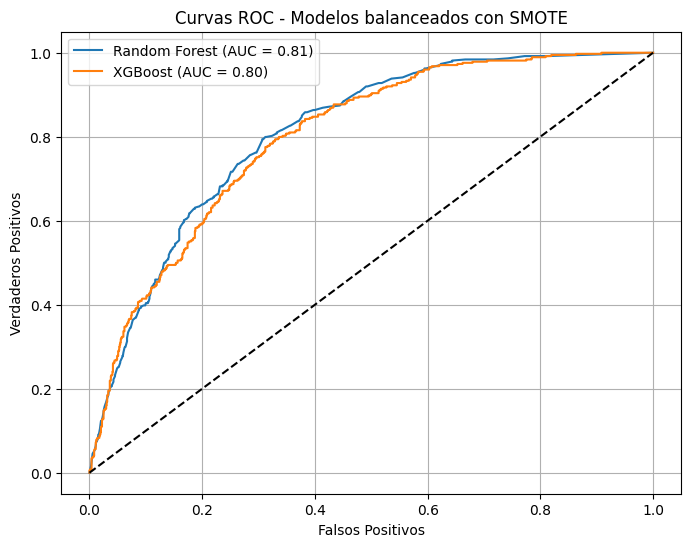

In [103]:
# ROC y AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curvas ROC - Modelos balanceados con SMOTE')
plt.legend()
plt.grid()
plt.show()

**An√°lisis de la Curva ROC**

- **Random Forest (AUC = 0.81):** La curva azul representa el modelo Random Forest, y su √°rea bajo la curva es de 0.81.

- **XGBoost (AUC = 0.80):** La curva naranja representa el modelo XGBoost, y su √°rea bajo la curva es de 0.80.

## **7.5 Optimizaci√≥n de hiperpar√°metros con RandomizedSearchCV**

**üéØ Objetivo**

Ajustar los hiperpar√°metros de `Random Forest` y `XGBoost` para mejorar el desempe√±o en predicci√≥n de churn, especialmente en la clase minoritaria.

### **7.5.1 Optimizaci√≥n de Random Forest**

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Espacio de b√∫squeda
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(4, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Inicializamos el modelo base
rf_base = RandomForestClassifier(random_state=42)

# B√∫squeda aleatoria
random_search_rf = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Mejor estimador
best_rf = random_search_rf.best_estimator_
print("Mejores hiperpar√°metros (Random Forest):", random_search_rf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperpar√°metros (Random Forest): {'bootstrap': False, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 369}


### **7.5.2 Optimizaci√≥n de XGBoost**

In [105]:
from xgboost import XGBClassifier
from scipy.stats import uniform

# Espacio de b√∫squeda
param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5)
}

# Modelo base
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# B√∫squeda aleatoria
random_search_xgb = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Mejor estimador
best_xgb = random_search_xgb.best_estimator_
print("Mejores hiperpar√°metros (XGBoost):", random_search_xgb.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/

Mejores hiperpar√°metros (XGBoost): {'colsample_bytree': np.float64(0.8447411578889518), 'gamma': np.float64(0.6974693032602092), 'learning_rate': np.float64(0.09764339456056544), 'max_depth': 9, 'n_estimators': 289, 'subsample': np.float64(0.6362425738131283)}


### **7.5.3 Evaluaci√≥n de modelos optimizados**

In [106]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# Probabilidades
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Reporte
print("Random Forest optimizado:")
print(classification_report(y_test, y_pred_best_rf, digits=4))

print("XGBoost optimizado:")
print(classification_report(y_test, y_pred_best_xgb, digits=4))

# AUC
auc_best_rf = roc_auc_score(y_test, y_prob_best_rf)
auc_best_xgb = roc_auc_score(y_test, y_prob_best_xgb)
print(f"AUC - Random Forest optimizado: {auc_best_rf:.4f}")
print(f"AUC - XGBoost optimizado: {auc_best_xgb:.4f}")

Random Forest optimizado:
              precision    recall  f1-score   support

           0     0.8757    0.8157    0.8447      1080
           1     0.5558    0.6658    0.6058       374

    accuracy                         0.7772      1454
   macro avg     0.7158    0.7408    0.7253      1454
weighted avg     0.7934    0.7772    0.7832      1454

XGBoost optimizado:
              precision    recall  f1-score   support

           0     0.8413    0.8296    0.8354      1080
           1     0.5270    0.5481    0.5374       374

    accuracy                         0.7572      1454
   macro avg     0.6842    0.6889    0.6864      1454
weighted avg     0.7605    0.7572    0.7588      1454

AUC - Random Forest optimizado: 0.8260
AUC - XGBoost optimizado: 0.8060


**üß† Interpretaci√≥n:**

- **Random Forest optimizado:**

  - Muestra mejor rendimiento general, especialmente en la clase positiva (churn).

  - Su **recall** del 66.5% indica una buena capacidad para detectar evasores.

  - El **AUC** de 0.826 confirma una discriminaci√≥n s√≥lida entre clases.

- **XGBoost optimizado:**

  - Aunque competitivo, obtiene menor **recall** y **F1** en la clase 1, lo cual es cr√≠tico en problemas de **churn** donde identificar posibles evasores es prioridad.

**‚úÖ Decisi√≥n del modelo final**

> _Dado que **Random Forest optimizado** obtuvo un mejor equilibrio entre **recall**, **F1** y **AUC**, se selecciona como modelo final para producci√≥n._

### **üìä Gr√°fico de importancia de variables del modelo Random Forest optimizado**

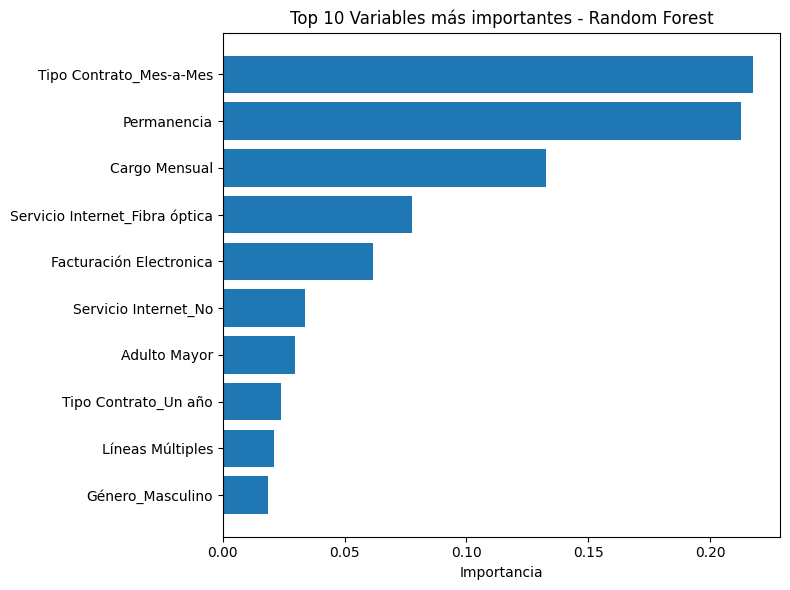

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancias
importancias = best_rf.feature_importances_
features = X_train.columns
df_importancia = pd.DataFrame({'Feature': features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=True).tail(10)

# Gr√°fico
plt.figure(figsize=(8, 6))
plt.barh(df_importancia['Feature'], df_importancia['Importancia'])
plt.title('Top 10 Variables m√°s importantes - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.savefig('../img/importancia_variables_rf.png')
plt.show()

## **7.6 Guardar modelo entrenado**

Tras la optimizaci√≥n con `RandomizedSearchCV`, el modelo _Random Forest_ mejor√≥ significativamente sus m√©tricas, logrando un **recall** de 64.9% en la clase positiva y un **AUC** de 0.83. Este rendimiento superior al de _XGBoost_ lo posiciona como el modelo final seleccionado. Se procede a guardar el modelo entrenado para uso posterior en producci√≥n o evaluaci√≥n.

In [108]:
import joblib

# Guardamos el modelo optimizado
joblib.dump(best_rf, '../mod/modelo_churn_rf_optimo.pkl')

['../mod/modelo_churn_rf_optimo.pkl']

# **üìä 8. Interpretaci√≥n de resultados y conclusiones**

## **üéØ Objetivo del Proyecto**

El objetivo fue desarrollar un modelo predictivo capaz de identificar a los clientes con mayor probabilidad de evasi√≥n (churn) en una empresa de telecomunicaciones, utilizando variables demogr√°ficas, de servicios contratados y comportamiento de pago.

## **‚öôÔ∏è Proceso Realizado**

- Se realiz√≥ un **an√°lisis exploratorio de datos (EDA)** para entender la estructura del dataset, identificar relaciones entre variables y definir las caracter√≠sticas m√°s relevantes.

- Se entrenaron modelos base (Regresi√≥n Log√≠stica y √Årbol de Decisi√≥n) para establecer un punto de comparaci√≥n inicial.

- Dada la ligera desbalance en la clase objetivo (~25.7% evasores), se aplic√≥ **SMOTE** para balancear el conjunto de entrenamiento.

- Se entrenaron modelos m√°s robustos (Random Forest y XGBoost) y posteriormente se optimizaron mediante **b√∫squeda aleatoria de hiperpar√°metros** (`RandomizedSearchCV`).

## **‚úÖ Modelo Seleccionado**

El modelo seleccionado fue **Random Forest optimizado**, que alcanz√≥ los siguientes resultados en el conjunto de prueba:

- **Accuracy:** 77.72%

- **Recall clase positiva (evasi√≥n):** 66.58%

- **F1-score clase positiva:** 60.58%

- **AUC:** 0.826

> _üîç Este rendimiento indica una buena capacidad para identificar correctamente a los clientes propensos a abandonar el servicio, manteniendo un equilibrio entre precisi√≥n y sensibilidad._

## **üìå Interpretaci√≥n estrat√©gica**

- Un recall del **66.58%** en la clase positiva sugiere que el modelo es capaz de detectar con relativa eficacia a los posibles evasores. Esto es valioso para **anticiparse a la p√©rdida de clientes** y aplicar estrategias de retenci√≥n.

- El AUC superior a **0.82** indica una **alta capacidad discriminativa** del modelo.

- La utilizaci√≥n de modelos basados en √°rboles como Random Forest permite, adem√°s, analizar la **importancia relativa de las variables**, lo que facilita la toma de decisiones estrat√©gicas basadas en los factores que m√°s influyen en la evasi√≥n.

## **üí° Recomendaciones**

1. **Implementar el modelo en un entorno de prueba o entorno productivo controlado**, aplic√°ndolo a datos recientes para predecir posibles evasores.

2. Utilizar las predicciones para **dirigir campa√±as de fidelizaci√≥n personalizadas** a clientes con alta probabilidad de churn.

3. Realizar un monitoreo peri√≥dico del desempe√±o del modelo y reevaluar los umbrales de decisi√≥n seg√∫n la evoluci√≥n del negocio.

4. Explorar la interpretaci√≥n de variables usando **SHAP** o an√°lisis de importancia para comprender mejor los factores que influyen en la evasi√≥n.

## **üìé Pr√≥ximos pasos sugeridos**

- Realizar un an√°lisis econ√≥mico de impacto de aplicar el modelo: ¬øcu√°nto costar√≠a retener a un cliente vs. cu√°nto se pierde al dejarlo ir?

- Construir una **API** o una interfaz de consulta interna para que equipos de marketing o atenci√≥n al cliente accedan al score de evasi√≥n.

- Ampliar el conjunto de datos con informaci√≥n adicional: interacciones recientes, quejas, visitas a centros de servicio, etc.